In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.arange(-1, 1.1, .1, dtype=float)
y = np.array([1-i for i in x], dtype=float)
stock_a = 0.1
stock_a_risk = 0.1
stock_b = 0.14
stock_b_risk = 0.14
riskfree_p = 0.04


In [3]:
market_df = pd.DataFrame({"stock_A": stock_a, "stock_B": stock_b, "risk_A": stock_a_risk, "risk_B": stock_b_risk}, index=[0])

In [4]:
market_df

,stock_A,stock_B,risk_A,risk_B
0,0.1,0.14,0.1,0.14


In [5]:
#set number of runs of random portfolio weights
num_portfolios = 250

#set up array to hold results
results = np.zeros((num_portfolios,4))

corr = 0.4

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(2)
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = weights[0]*stock_a + weights[1]*stock_b
    
    portfolio_std_dev = np.sqrt(
        weights[0]**2*stock_a_risk**2 + weights[1]**2*stock_b_risk**2 + weights[0]*weights[1]*2*stock_a_risk*stock_b_risk*corr
    ) 
    
    #store results in results array
    results[i,0] = weights[0]
    results[i,1] = weights[1]
    results[i,2] = portfolio_return
    results[i,3] = portfolio_std_dev
    


In [6]:
results_frame = pd.DataFrame(results, columns=["weight_A", "weight_B", "combined_return", "combined_volatility"])

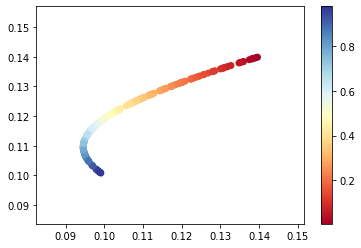

In [7]:
plt.scatter(results_frame.combined_volatility,results_frame.combined_return,c=results_frame.weight_A,cmap='RdYlBu')
plt.colorbar()

In [8]:
results_frame.loc[(results_frame.weight_A <= 0.51) & (results_frame.weight_B <= 0.51)]

,weight_A,weight_B,combined_return,combined_volatility
36,0.503404,0.496596,0.119864,0.100834
46,0.509897,0.490103,0.119604,0.100533
52,0.506987,0.493013,0.119721,0.100667
90,0.494195,0.505805,0.120232,0.101274


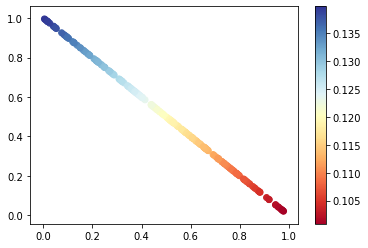

In [9]:
plt.scatter(results_frame.weight_A, results_frame.weight_B, c=results_frame.combined_return,cmap='RdYlBu')
plt.colorbar()

In [10]:
tangent_p = pd.DataFrame({"market_weight": y, "riskfree_weight": x})

In [11]:
tangent_p["riskfree_rate"] = riskfree_p

In [12]:
tangent_p["market_rate"] = 0.120025
tangent_p["market_risk"] = 0.101025

In [13]:
tangent_p["combined_return"] = tangent_p.apply(lambda row: row.market_rate * row.market_weight + row.riskfree_weight * row.riskfree_rate, axis=1)

In [14]:
tangent_p["combined_risk"] = tangent_p.apply(lambda row: math.sqrt(row.market_weight**2*row.market_risk**2), axis=1)

In [15]:
tangent_p

,market_weight,riskfree_weight,riskfree_rate,market_rate,market_risk,combined_return,combined_risk
0,2.000000e+00,-1.000000e+00,0.04,0.120025,0.101025,0.200050,2.020500e-01
1,1.900000e+00,-9.000000e-01,0.04,0.120025,0.101025,0.192048,1.919475e-01
2,1.800000e+00,-8.000000e-01,0.04,0.120025,0.101025,0.184045,1.818450e-01
3,1.700000e+00,-7.000000e-01,0.04,0.120025,0.101025,0.176043,1.717425e-01
4,1.600000e+00,-6.000000e-01,0.04,0.120025,0.101025,0.168040,1.616400e-01
5,1.500000e+00,-5.000000e-01,0.04,0.120025,0.101025,0.160037,1.515375e-01
6,1.400000e+00,-4.000000e-01,0.04,0.120025,0.101025,0.152035,1.414350e-01
7,1.300000e+00,-3.000000e-01,0.04,0.120025,0.101025,0.144033,1.313325e-01
8,1.200000e+00,-2.000000e-01,0.04,0.120025,0.101025,0.136030,1.212300e-01
9,1.100000e+00,-1.000000e-01,0.04,0.120025,0.101025,0.128028,1.111275e-01


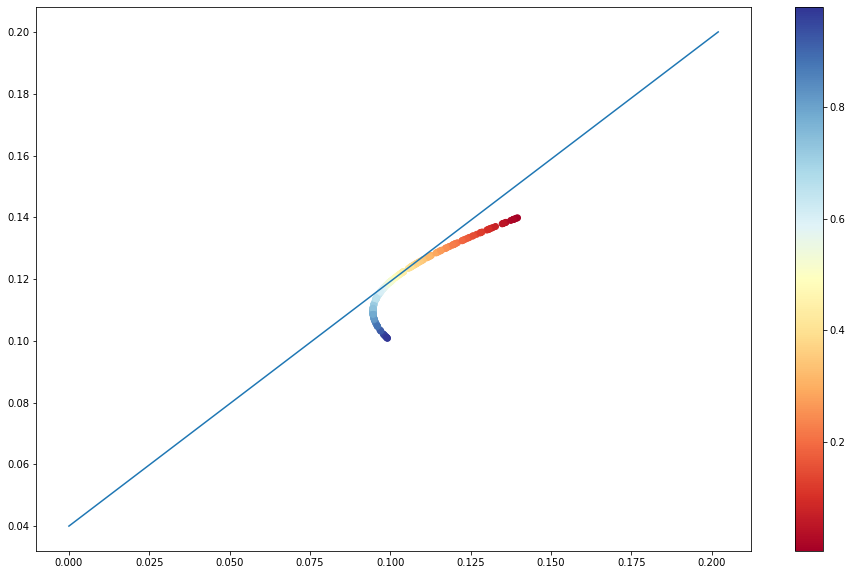

In [16]:
plt.figure(figsize=(16,10))
plt.plot(tangent_p.combined_risk,tangent_p.combined_return)

plt.scatter(results_frame.combined_volatility,results_frame.combined_return,c=results_frame.weight_A,cmap='RdYlBu')

plt.colorbar()